# Análisis Exploratorio de Datos

In [6]:
# Agregamos la raíz del proyecto al path y para importar los paquetes de src 
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Importamos librerías necesarias
import src.data.preprocess as pp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargamos el dataset limpio
df = pp.preprocesar_datos()

Iniciando preprocesamiento...
Registros iniciales: 30000
Registros eliminados por inconsistencias de deuda: 1739
Registros eliminados por inconsistencias factura-pago: 2769
Registros finales: 25492
Preprocesamiento completado.


In [4]:
print(df.shape)
df.head()

(25492, 9)


,limite_credito,genero,educacion,estado_civil,edad,meses_deuda_sep,pago_sep,factura_sep,default_oct
0,20000,2,2,1,24,-2,0,0,1
2,90000,2,2,2,34,0,15549,5000,0
3,50000,2,2,1,37,0,29547,1000,0
4,50000,1,2,1,57,0,19131,679,0
5,50000,1,1,2,37,0,20024,800,0


### Análisis de cada variable

C:\Users\matia\AppData\Local\Temp\ipykernel_2008\4197966401.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\matia\AppData\Local\Temp\ipykernel_2008\4197966401.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\matia\AppData\Local\Temp\ipykernel_2008\4197966401.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\matia\AppData\Local\Temp\ipykernel_2008\4197966401.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_

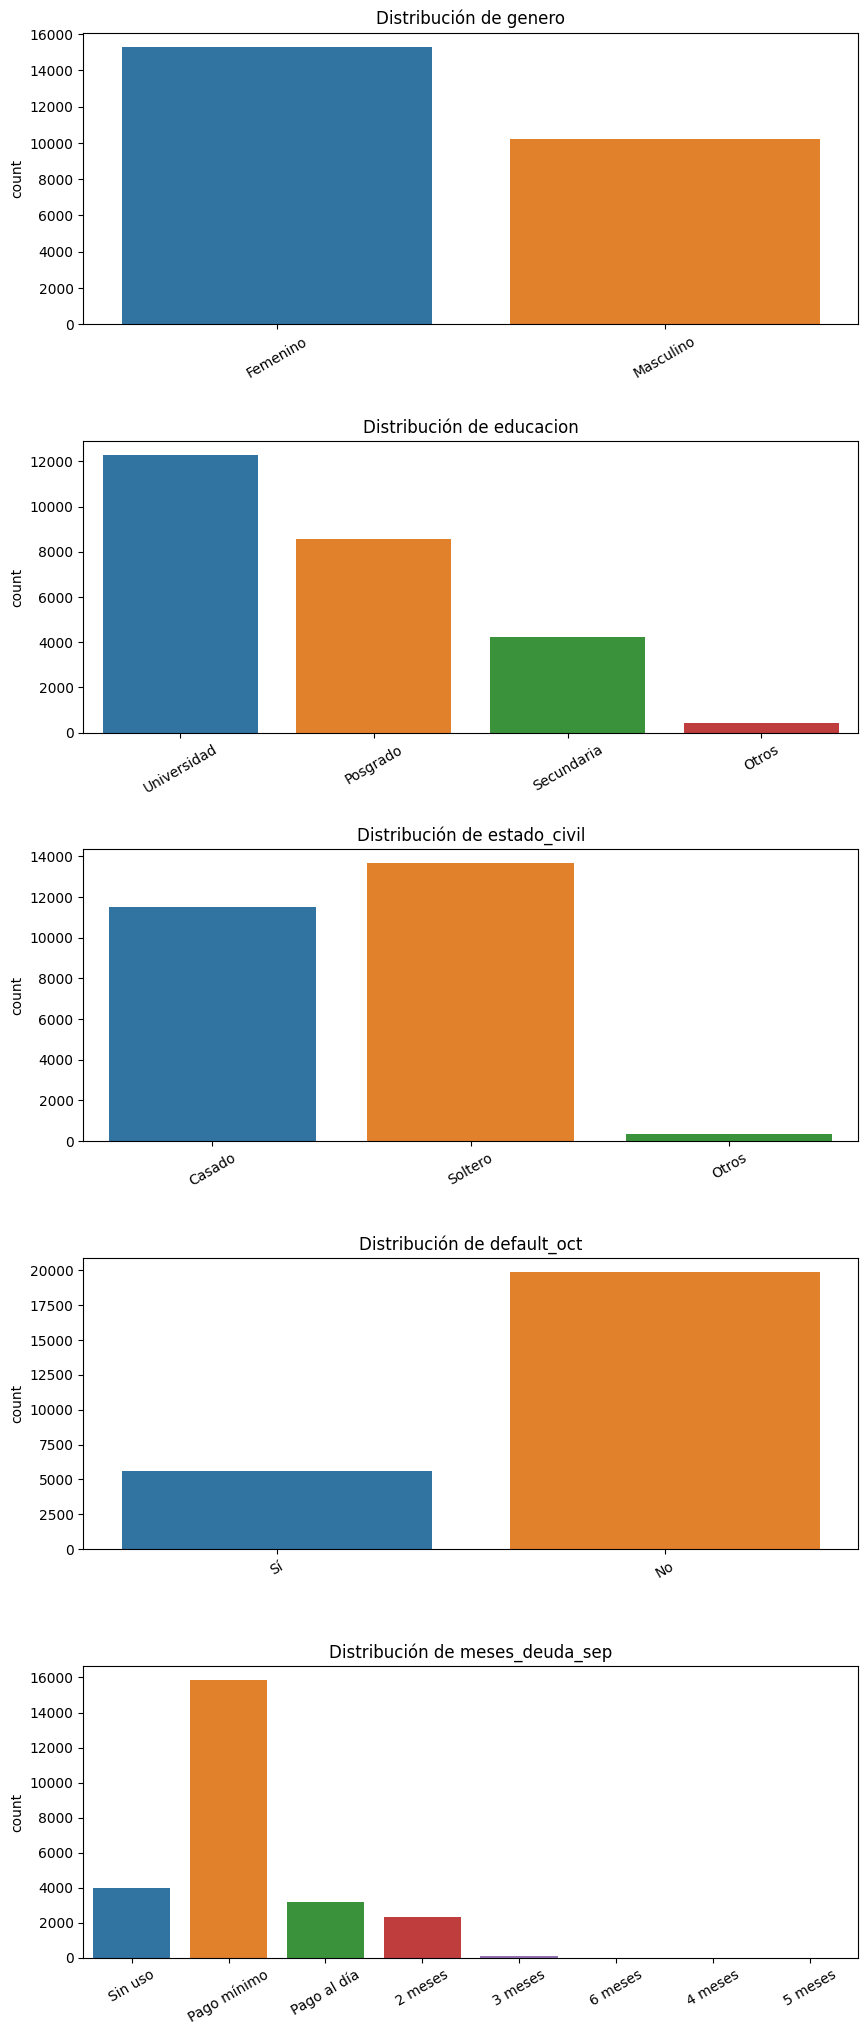

In [38]:
# Guardamos las variables categóricas para generar gráficos de barras y observar la distribución
col_cat = ['genero', 'educacion', 'estado_civil', 'default_oct', 'meses_deuda_sep']

# Creamos una copia del dataframe para mapear las categorías con los numeros
df_vis = df.copy()

# Definimos los mapeos
diccionarios_mapeo = {
    'genero': {1: 'Masculino', 2: 'Femenino'},
    'educacion': {1: 'Posgrado', 2: 'Universidad', 3: 'Secundaria', 4: 'Otros'},
    'estado_civil': {1: 'Casado', 2: 'Soltero', 3: 'Otros'},
    'default_oct': {0: 'No', 1: 'Sí'},
    'meses_deuda_sep': {-2: 'Sin uso', -1: 'Pago al día', 0: 'Pago mínimo',
         2: '2 meses', 3: '3 meses', 4: '4 meses', 5: '5 meses', 6: '6 meses'}
}

# Aplicamos el mapeo al dataset auxiliar
for col in col_cat:
    if col in diccionarios_mapeo:
        df_vis[col] = df_vis[col].map(diccionarios_mapeo[col])

# Gráficos de barras
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10, 25))
fig.subplots_adjust(hspace=0.40)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df_vis, ax=ax[i], hue=col)
    ax[i].set_title(f'Distribución de {col}')
    ax[i].set_xlabel('')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

plt.show()

In [22]:
df.drop(columns=col_cat).describe()

,limite_credito,edad,meses_deuda_sep,pago_sep,factura_sep
count,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000
mean,163228.843559,35.357092,-0.244077,43298.034874,5626.481916
std,128605.000470,9.226306,1.048683,62188.594355,18902.855357
min,10000.000000,21.000000,-2.000000,-339603.000000,0.000000
25%,50000.000000,28.000000,-1.000000,1476.750000,326.000000
50%,130000.000000,34.000000,0.000000,19800.000000,1701.000000
75%,230000.000000,41.000000,0.000000,56149.500000,4328.750000
max,1000000.000000,79.000000,6.000000,961664.000000,528666.000000


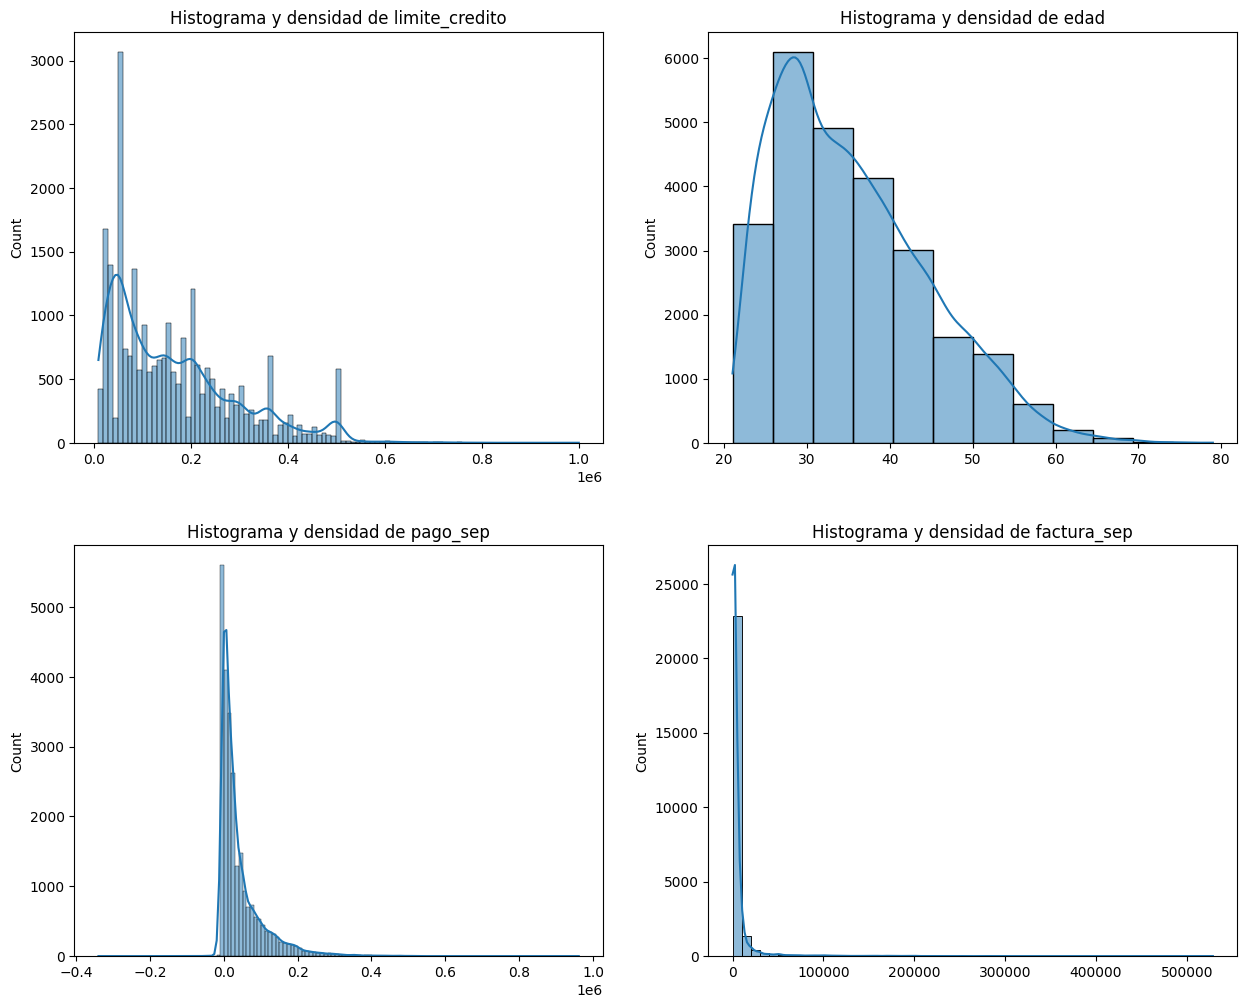

In [39]:
# Guardamos las variables numéricas
col_num = ['limite_credito', 'edad', 'pago_sep', 'factura_sep']


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
fig.subplots_adjust(hspace=0.25)
ax = ax.flatten() # flatten() aplana la matriz de 2x2 en un vector iterable para las gráficas

for i, col in enumerate(col_num):
    if col == 'edad':
        wbin = 5
    else:
        wbin = 10000
    sns.histplot(x=col, data=df_vis, ax=ax[i], binwidth = wbin, kde=True)
    ax[i].set_title(f'Histograma y densidad de {col}')
    ax[i].set_xlabel('')

